# Negative breaks XGBoost model - local run

### Peter R.
#### 2024-02-22

Given that DRAC was down on Feb. 22 and 23, 2024, I had to run DRAC XGBoost models locally. (Once, DRAC is up again I can run these models there.)



In [15]:
# 2024-02-20
# Peter R.
# XGBoost script
# Positive breaks, n_estimators (number of trees)=1000 and with optimal parameter from DRAC model_bp1 & early stopping

import os
import time

import pandas as pd
from numpy import nan
import xgboost as xgb
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


start = time.time()

# Get the current working directory
cwd = os.getcwd()

#print(cwd)

# DRAC directory
#os.chdir("/home/georod/projects/def-mfortin/georod/scripts/github/forc_trends/models/xgboost")
# Win directory
os.chdir(r'C:\Users\Peter R\github\forc_trends\models\xgboost')


print("XGB version:", xgb.__version__)
print("negative breaks")

# Windows
df1 = pd.read_csv(r'.\data\forest_evi_breaks_negative_v3.csv', skipinitialspace=True)
# DRAC
#df1 = pd.read_csv(r'./data/forest_evi_breaks_positive_v2.csv', skipinitialspace=True)
#df1.head()

df2 = pd.get_dummies(df1, columns=['for_pro'], dtype=float)

#df2= df2[df2['precipitation'].notna()]

#df2 = df2[df2['mat'].notna()]

#df2 = df2[df2['for_con'].notna()]

#X1 = df2.iloc[:,2:30]

#X1.drop(X1.columns[[0:5, 7:10, 12, 15, 16, 18, 19, 20,21,22,23,24,25]], axis=1,inplace=True)

#cols2 = ['for_age','for_con', 'cmi_sm', 'cmi_sm_lag1', 'cmi_sm_lag2', 'cmi_sm_lag3', 'dd5_wt', 'nffd_wt', 'nffd_wt_lag1', 'nffd_wt_lag2', 'nffd_wt_lag3', 'pas_sm', 'pas_sm_lag1', 'pas_sm_lag2', 'pas_sm_lag3', 'for_pro_0']
#cols2 = ['for_age','for_con', 'cmi_sm', 'cmi_sm_lag1', 'cmi_sm_lag2', 'cmi_sm_lag3', 'dd5_wt', 'nffd_wt', 'nffd_wt_lag1', 'nffd_wt_lag2', 'nffd_wt_lag3', 'pas_sm', 'pas_sm_lag1', 'pas_sm_lag2', 'pas_sm_lag3', 'for_pro_0', 'map', 'map_lag1', 'map_lag2', 'map_lag3','mat', 'mat_lag1', 'mat_lag2', 'mat_lag3','rh', 'rh_lag1', 'rh_lag2', 'rh_lag3']
#cols2 =  ['for_con', 'cmi_sm', 'cmi_sm_lag1', 'cmi_sm_lag2', 'cmi_sm_lag3', 'dd5_wt', 'dd5_wt_lag2']
cols2 = ['for_age','for_con', 'cmi_sm', 'cmi_sm_lag1', 'cmi_sm_lag2', 'cmi_sm_lag3', 'dd5_wt', 'dd5_wt_lag2', 'for_pro_0']
X1 = df2[cols2]

# vars used in previous version: 'map', 'map_lag1', 'map_lag2', 'map_lag3','mat', 'mat_lag1', 'mat_lag2', 'mat_lag3','rh', 'rh_lag1', 'rh_lag2', 'rh_lag3'
#features_names1 = ["age","deciduous","elevation","precipitation","temperature","precipitation_lag1", "temperature_lag1", "precipitation_lag2", "temperature_lag2", "precipitation_lag3", "temperature_lag3",
#                 "rh" ,"rh_lag1","rh_lag2","rh_lag3"]

y1 = df2.iloc[:,6].abs()

# Fine tune parameters using RandomizedSearchCV (faster)
# max_depth is tree complexity in Elith et al. 2008
# n_estimators=100 is the number of trees. Elith et al. 2008 say this should be 1000 at least
# Elith et al. 2008 suggests low learning rate

seed = 7 # random seed to help with replication
testsize1 = 0.33 # percent of records to test after training

# Split data set. Note the 'stratify' option
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=testsize1, random_state=seed)



#{'reg_lambda': 10, 'reg_alpha': 0.1, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.005, 'gamma': 0.05}

#{'reg_lambda': 10, 'reg_alpha': 1, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0.2}
            
model_bp2 = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, reg_lambda=10, reg_alpha=1)



# EVALUATION (with test)
eval_set = [(x1_train, y1_train), (x1_test, y1_test)]
#UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
model_bp2.fit(x1_train, y1_train, eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model_bp2.predict(x1_test)
predictions = [round(value) for value in y_pred]
# retrieve performance metrics
results = model_bp2.evals_result()

mse = mean_squared_error(y1_test, y_pred)
#r2 = explained_variance_score(y1_test, ypred)
r2 = r2_score(y1_test, y_pred)

# adjusted R-squared
adj_r2 = 1 - (((1-r2) * (len(y1_test)-1))/(len(y1_test)-x1_test.shape[1]-1))


print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

print("R-sq: %.3f" % r2)

print("R-sq-adj: %.3f" % adj_r2)


# Save model
# save in JSON format
#model_bp1.save_model("model_bp1_pos_brks_v1.json")
#model_bp2.save_model("model_bp2_pos_brks_v3.json") # Take 2 with new climate vars
#model_bp2.save_model("model_bp2_pos_brks_v4_local.json") # Take 2 with new climate vars + old vars
#model_bp2.save_model("model_bp2_neg_brks_v5_local.json") # Take 3 with VIF var subset
#model_bp2.save_model("model_bp2_neg_brks_v6_local.json") # Take 3 with VIF var subset + a few old vars (for_age, etc.)
# save in text format
#model_m2.save_model("model_m2.txt")

end = time.time()

total_time = end-start
#total_time
print("Total time: %.2f" % total_time)

# Load model
# load saved model
#model2 = xgb.Regressor()
#model2.load_model("model_regression1.json")

XGB version: 1.7.6
negative breaks
MSE: 82019.01
RMSE: 286.39
R-sq: 0.333
R-sq-adj: 0.331
Total time: 5.92


**Table 1**: Model comparison for positive breaks.

| Month    | Model v3| Model v4 | Model v5 | Model v6 |
| -------- | ------- |-------- | ------- |-------- | 
| MSE|  - |82143.04|89670.87|85928.55|
| RMSE| -   |286.61|299.45|293.14|
| R-sq| - |0.382|0.325|0.354|
| R-sq Adj.| - |0.378|0.324|0.352|


**Table 2**: Model comparison for negative breaks. Same as above but without climate NAs.

| Month    | Model v3| Model v4 | Model v5 | Model v6 |
| -------- | ------- |-------- | ------- |-------- | 
| MSE|  - |81133.23|88292.46|85215.95|
| RMSE| -   |284.84|297.14|291.92|
| R-sq| -  |0.369|0.313|0.337|
| R-sq Adj.| - |0.364|0.312|0.335|


In [16]:
#Describe the data
print(X1.describe)

<bound method NDFrame.describe of        for_age  for_con  cmi_sm  cmi_sm_lag1  cmi_sm_lag2  cmi_sm_lag3  \
0       91.543   34.563  -9.609       -2.459       -4.466       -9.125   
1       93.157   41.928  -3.780       -3.042       -9.705       -8.027   
2       80.157   30.939  -2.536       -2.718       -9.139       -7.145   
3       73.402   60.436  -6.655       -4.997       -9.749      -11.107   
4       70.564   60.695  -6.927       -5.248      -10.014      -11.411   
...        ...      ...     ...          ...          ...          ...   
11964   84.335    7.128  -4.170        1.038        6.725       -0.762   
11965   78.272   59.450  -5.039        9.399       -6.527       -4.129   
11966   77.295   35.050   9.660       -6.710       -3.543        3.379   
11967  101.955   15.752  11.608        0.161       -3.868       -5.483   
11968   91.300    7.532  -4.147        1.793        7.092       -0.789   

       dd5_wt  dd5_wt_lag2  for_pro_0  
0       5.685        6.000        1.0

In [17]:
# Count NAs per columns to check that step above worked
X1.isna().sum()

for_age        110
for_con        118
cmi_sm           0
cmi_sm_lag1      0
cmi_sm_lag2      0
cmi_sm_lag3      0
dd5_wt           0
dd5_wt_lag2      0
for_pro_0        0
dtype: int64

In [59]:
#Describe the data
#print(y1.describe)
print(y1.describe())

count    11521.000000
mean       824.063489
std        359.964614
min        119.280000
25%        586.178000
50%        746.453000
75%        973.434000
max       3550.364000
Name: magnitude, dtype: float64


### Plots

Feature importance plot

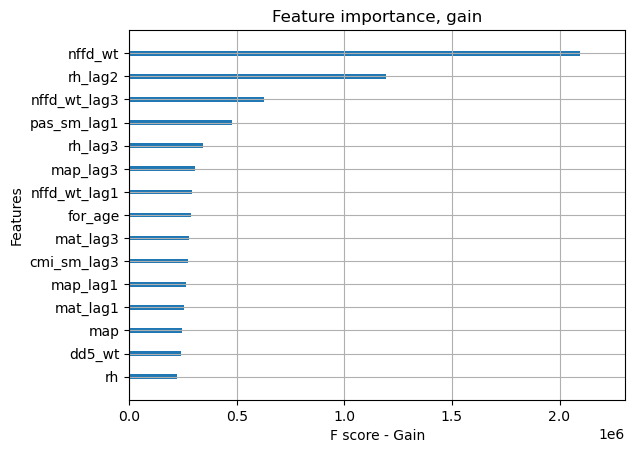

In [62]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
# Feature importance plot
# Plot, metric: gain
#‘gain’: the average gain across all splits the feature is used in.
xgb.plot_importance(model_bp2, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance, gain', 
                    xlabel='F score - Gain', ylabel='Features', 
                    importance_type='gain', max_num_features=15, grid=True, show_values=False) #, values_format='{v:.2f}' )

pyplot.savefig(r'.\figs\version2\neg_gain_m4_sv1_v1.png',  dpi=300, bbox_inches='tight')


pyplot.show()

Partial dependence plots

In [64]:
# create lis of feature names to be used in dependency plot so that high ranking vars are plotted
features_names1 = pd.DataFrame()
features_names1['columns'] = X1.columns
features_names1['importances'] = model_bp2.feature_importances_
features_names1.sort_values(by='importances',ascending=False,inplace=True)

#features_names2[:20]
#print(results.columns.tolist())

print(features_names1['columns'].tolist())


['nffd_wt', 'rh_lag2', 'nffd_wt_lag3', 'pas_sm_lag1', 'rh_lag3', 'map_lag3', 'nffd_wt_lag1', 'for_age', 'mat_lag3', 'cmi_sm_lag3', 'map_lag1', 'mat_lag1', 'map', 'dd5_wt', 'rh', 'pas_sm_lag2', 'pas_sm', 'cmi_sm_lag1', 'cmi_sm_lag2', 'map_lag2', 'mat_lag2', 'for_pro_0', 'rh_lag1', 'mat', 'cmi_sm', 'pas_sm_lag3', 'nffd_wt_lag2', 'for_con']


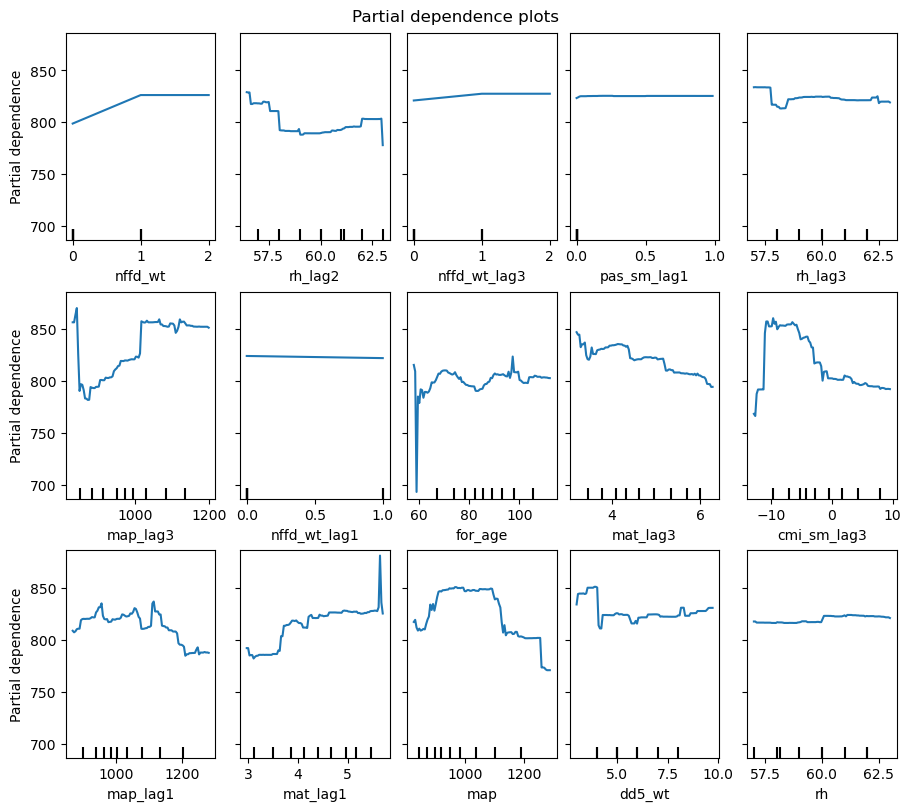

In [65]:
# Partial dependence plots

import matplotlib.pyplot as plt

# PDP is an average of the marginal effects of the features. We are averaging the response of all samples of the provided set.
from sklearn.inspection import PartialDependenceDisplay

features_names2 = features_names1['columns'].tolist()[0:15]

_, ax1 = plt.subplots(ncols=5, nrows=3, figsize=(9, 8), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(model_bp2, x1_train, features_names2, ax=ax1)

_ = display.figure_.suptitle(
    (
        "Partial dependence plots"
        
    ),
    fontsize=12,
)


plt.savefig(r'.\figs\version2\neg_partial_dep_m4_sv1_v1.png',  dpi=300, bbox_inches='tight')

plt.show()

# Black ticks on X-axis are deciles